### **GROUP 6**


*   NARELL VASQUEZ 
*   AARON RODRIGUEZ 
*   DAMION SAMUELS

**Unit 4 - Mini Project**
You will be working on a machine learning project using data from the UCI Machine Learning Repository.

The dataset is located at: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008 (google UCI Diabetes dataset) Diabetes 130-US hospitals for years 1999-2008 Data Set 

**Data Set Information:**

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks.

It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

Your goal is to make a classification model that can be used to predict something within the dataset.
For example:

-you can choose to predict whether a patient is likely to be a readmit in the hospital within 30days
-You can choose which features to use in your model (race, gender, age, etc.) and train your model.
-Your project should include a description of what you’re trying to accomplish, EDA, data wrangling, model creation, model evaluations, and model selections.
-Your analytics should include at least 2 different types of models (i.e. Logistic, KNN and Random Forest).

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Data Collection 

In [ ]:
patient_data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')


In [ ]:
patient_data_df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_data_df.shape

(101766, 50)

In [ ]:
patient_data_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data cases

In [ ]:
patient_data_df[patient_data_df['gender']=='Female'].shape[0] * 1


54708

In [ ]:
patient_data_df[patient_data_df['gender']=='Male'].shape[0]*1

47055

EDA (Exploratory Data Analisys)

Race vs Gender:


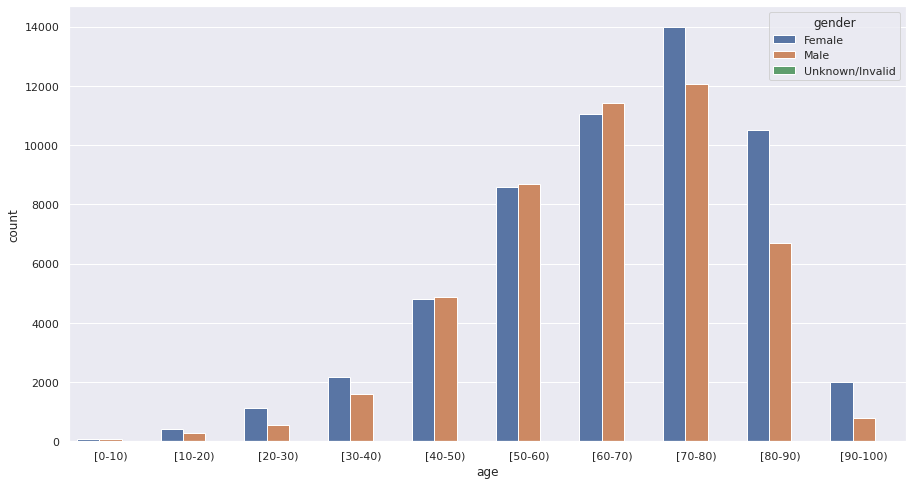

In [ ]:
print('Race vs Gender:')
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='age',hue='gender',data=patient_data_df)

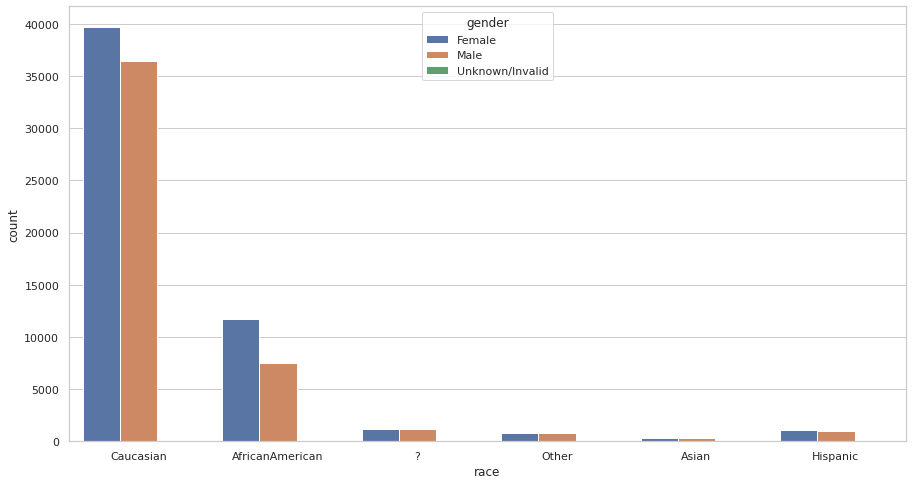

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='race',hue='gender',data=patient_data_df)

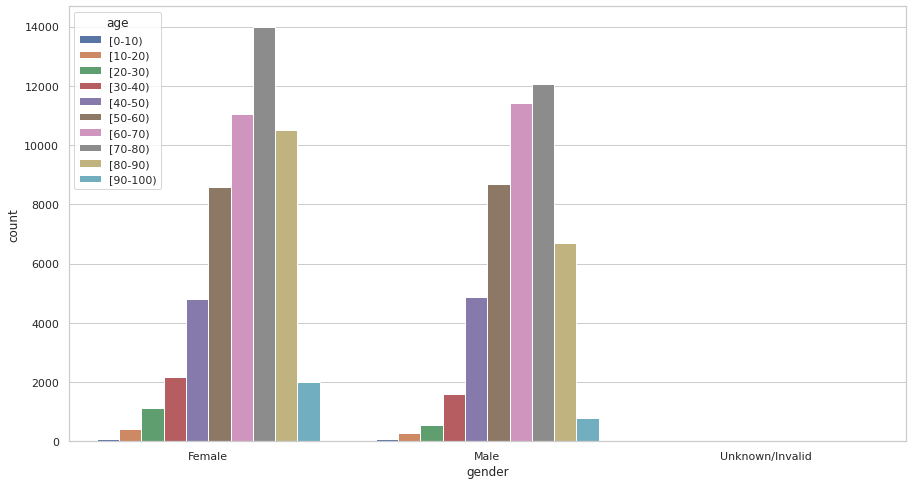

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='gender',hue='age',data=patient_data_df)

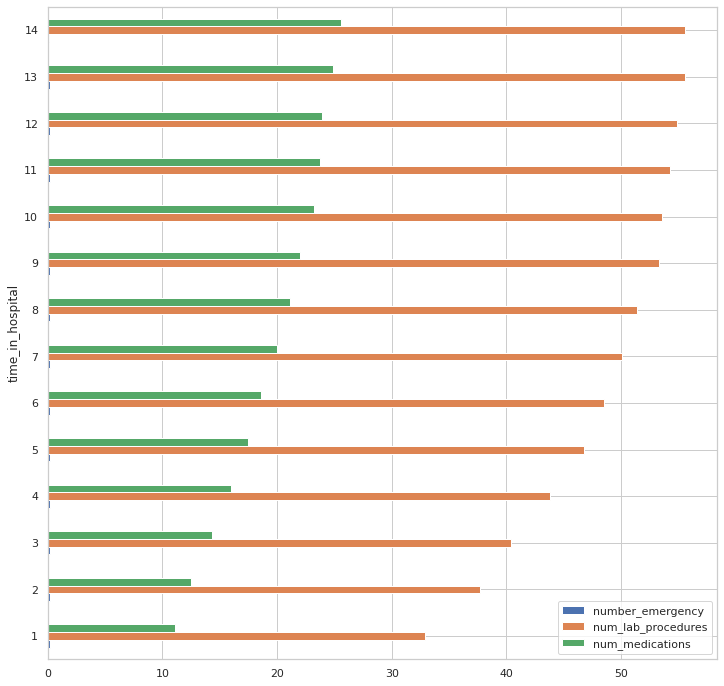

In [ ]:
patient_data_df.groupby('time_in_hospital')[['number_emergency', 'num_lab_procedures', 'num_medications']].mean().plot(kind='barh', figsize=(12,12))

This graph shows that patient that spend more time in the hopital receive a higher numer of lab procedures and medications, but the number of emergencies are low for patients with 1 day at the hospital as for patients with 14 days at the hospital. 


**DATA PRE PROCESSING**

In [ ]:
import numpy as np


In [ ]:
patient_data_df_01 = patient_data_df.copy()
patient_data_df_clean = patient_data_df_01.replace('?',np.NaN)
patient_data_missing_values = patient_data_df_clean.isnull().sum()
patient_data_missing_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
type(patient_data_df_clean)


pandas.core.frame.DataFrame

In [ ]:
patient_data_df_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_data_df_clean[patient_data_df_clean['admission_type_id'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


0.0

In [ ]:
patient_data_df_clean[patient_data_df_clean['payer_code'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


39.5574160328597

In [ ]:
patient_data_df_clean[patient_data_df_clean['race'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


2.2335554114340743

In [ ]:
patient_data_df_clean[patient_data_df_clean['discharge_disposition_id'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


0.0

In [ ]:
patient_data_df_clean[patient_data_df_clean['number_diagnoses'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


0.0

In [ ]:
patient_data_df_clean[patient_data_df_clean['insulin'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


0.0

In [ ]:
patient_data_df_clean[patient_data_df_clean['weight'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]


96.85847925633315

MORE THAN TWO

In [ ]:
patient_df_ml_prep_01= patient_data_df_clean.drop(['weight','race','insulin'],axis=1)

In [ ]:
patient_df_ml_prep_01.head()


,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_df_ml_prep_01['30DayReadmit'] = np.where(patient_df_ml_prep_01['readmitted'] == 'NO', 0, 1)


In [ ]:
patient_df_ml_prep_01.head()


,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30DayReadmit
0,2278392,8222157,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,0


In [ ]:
patient_df_ml_prep_01 = patient_df_ml_prep_01[((patient_df_ml_prep_01.discharge_disposition_id != 11) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 13) &
                                          (patient_df_ml_prep_01.discharge_disposition_id != 14) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 19) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 20) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 21))]

In [ ]:
patient_df_ml_prep_01.shape


(99343, 48)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,
numcolumn = patient_df_ml_prep_01.select_dtypes(include = [np.number]).columns
objcolumn = patient_df_ml_prep_01.select_dtypes(include = ['object']).columns


# Substituting 0 and unknown,

patient_df_ml_prep_01[numcolumn] = patient_df_ml_prep_01[numcolumn].fillna(0)
patient_df_ml_prep_01[objcolumn] = patient_df_ml_prep_01[objcolumn].fillna("unknown")

In [ ]:
patient_df_ml_prep_01.head()


,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30DayReadmit
0,2278392,8222157,Female,[0-10),6,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Female,[10-20),1,1,7,3,unknown,unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,Female,[20-30),1,1,7,2,unknown,unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Male,[30-40),1,1,7,2,unknown,unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Male,[40-50),1,1,7,1,unknown,unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,0


ENCODE DATA

In [ ]:
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
patient_df_ml_prep_01[listcol] = codemap(patient_df_ml_prep_01[listcol], codes)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
patient_df_ml_prep_01.describe


<bound method NDFrame.describe of         encounter_id  patient_nbr  gender  ... diabetesMed  readmitted  30DayReadmit
0            2278392      8222157  Female  ...          No          NO             0
1             149190     55629189  Female  ...         Yes         >30             1
2              64410     86047875  Female  ...         Yes          NO             0
3             500364     82442376    Male  ...         Yes          NO             0
4              16680     42519267    Male  ...         Yes          NO             0
...              ...          ...     ...  ...         ...         ...           ...
101761     443847548    100162476    Male  ...         Yes         >30             1
101762     443847782     74694222  Female  ...         Yes          NO             0
101763     443854148     41088789    Male  ...         Yes          NO             0
101764     443857166     31693671  Female  ...         Yes          NO             0
101765     443867222    1754293

In [ ]:
patient_df_ml_prep_02 = patient_df_ml_prep_01.drop(['payer_code', "patient_nbr", 'number_inpatient','change'], axis =1)


In [ ]:
patient_df_ml_prep_02.head()


,encounter_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted,30DayReadmit
0,2278392,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,Female,[10-20),1,1,7,3,unknown,59,0,18,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,1
2,64410,Female,[20-30),1,1,7,2,unknown,11,5,13,2,0,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,Male,[30-40),1,1,7,2,unknown,44,1,16,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
4,16680,Male,[40-50),1,1,7,1,unknown,51,0,8,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0


**Normalization of the Data **

In [ ]:

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_diagnoses']

normal = StandardScaler()

patient_df_ml_prep_02[listnormal] = normal.fit_transform(patient_df_ml_prep_02[listnormal])

patient_df_ml_prep_02.describe()

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,30DayReadmit
count,9.934300e+04,99343.000000,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,1.649689e+08,2.030259,3.517882,5.731083,1.874346e-14,-3.424256e-15,3.449070e-15,-1.776343e-15,1.182191e-13,6.322393e-14,-9.426101e-14,0.471256
std,1.026535e+08,1.446373,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.252200e+04,1.000000,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-3.298145e+00,0.000000
25%,8.469034e+07,1.000000,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-7.221572e-01,0.000000
50%,1.522321e+08,1.000000,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,3.082380e-01,0.000000
75%,2.301018e+08,3.000000,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,8.234355e-01,1.000000
max,4.438672e+08,8.000000,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,4.429819e+00,1.000000


In [ ]:
#Let's store readmitted in y and rest of the columns in X,

Y = patient_df_ml_prep_02['30DayReadmit']
X = patient_df_ml_prep_02.drop(['30DayReadmit'], axis =1)
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)


In [ ]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)


shape of Xtrain,Xtest: (79474, 234) (19869, 234)


## LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)


In [ ]:
print(" The Logistic regression model accuracy:" ,logisticreg.score(Xtest, Ytest))


 The Logistic regression model accuracy: 0.5287634002717801


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[10506     0]
 [ 9363     0]]


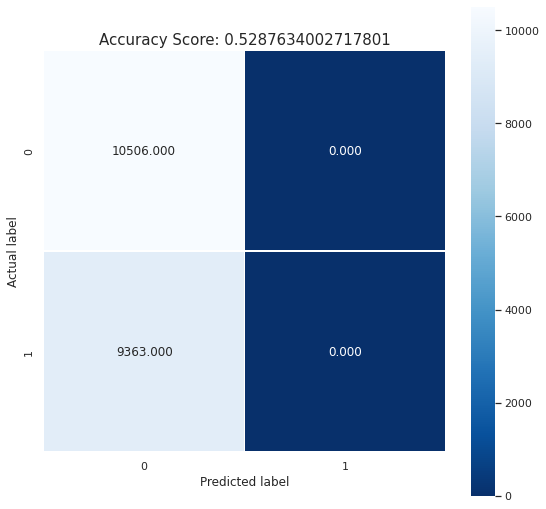

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names= ['NO', 'YES']))                            

              precision    recall  f1-score   support

          NO       0.53      1.00      0.69     10506
         YES       0.00      0.00      0.00      9363

    accuracy                           0.53     19869
   macro avg       0.26      0.50      0.35     19869
weighted avg       0.28      0.53      0.37     19869



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
YScre = logisticreg.decision_function(Xtest)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


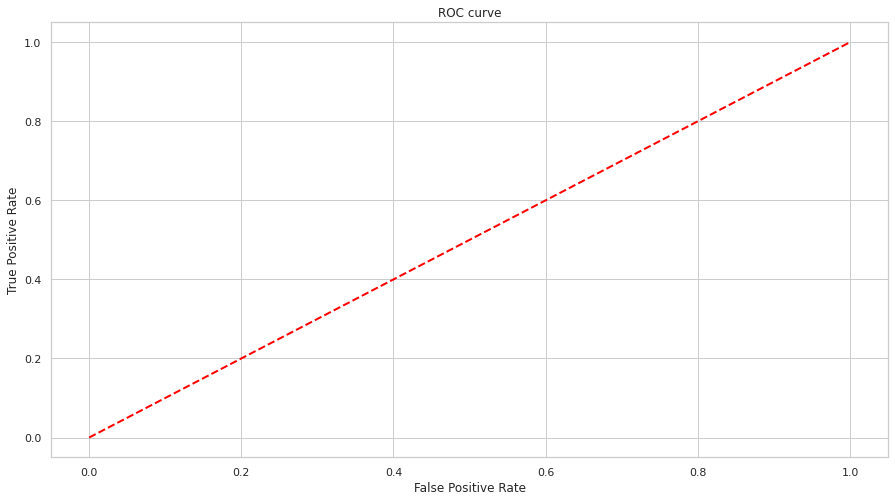

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn import metrics


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


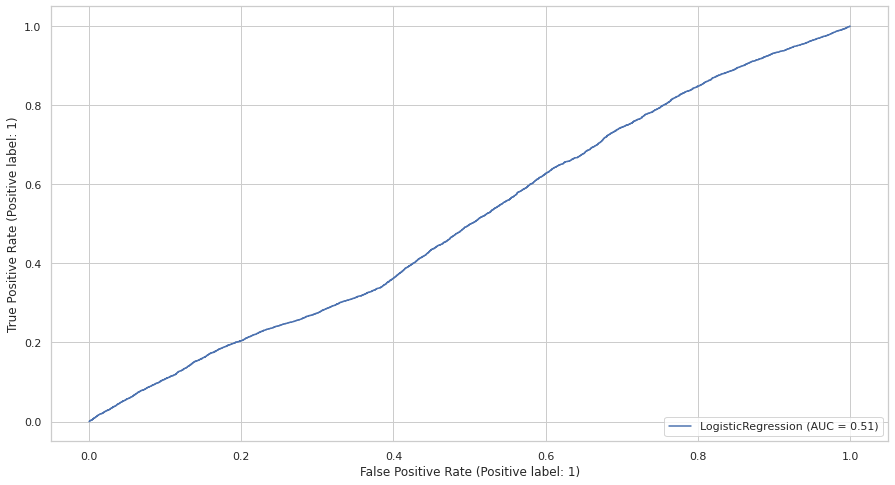

In [ ]:
metrics.plot_roc_curve(logisticreg, Xtest, Ytest)  


## RANDOM FOREST 




In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [ ]:
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [ ]:
print(" Randomeforest classification Accuracy: ", random_forest.score(Xtest, Ytest))


 Randomeforest classification Accuracy:  1.0


In [ ]:
print(confusion_matrix(Ytest, Yrandforest))


[[10506     0]
 [    0  9363]]


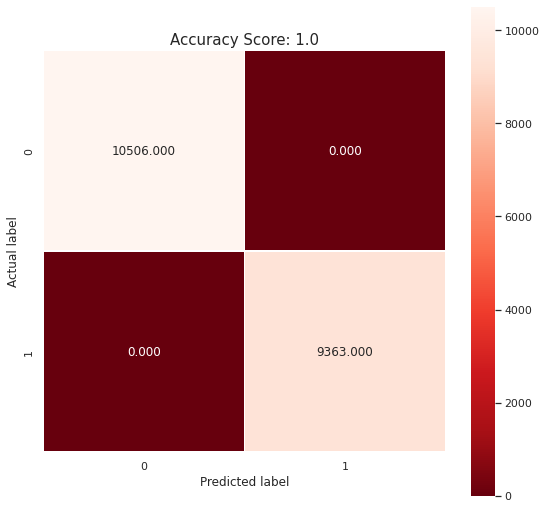

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))


              precision    recall  f1-score   support

          NO       1.00      1.00      1.00     10506
         YES       1.00      1.00      1.00      9363

    accuracy                           1.00     19869
   macro avg       1.00      1.00      1.00     19869
weighted avg       1.00      1.00      1.00     19869



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


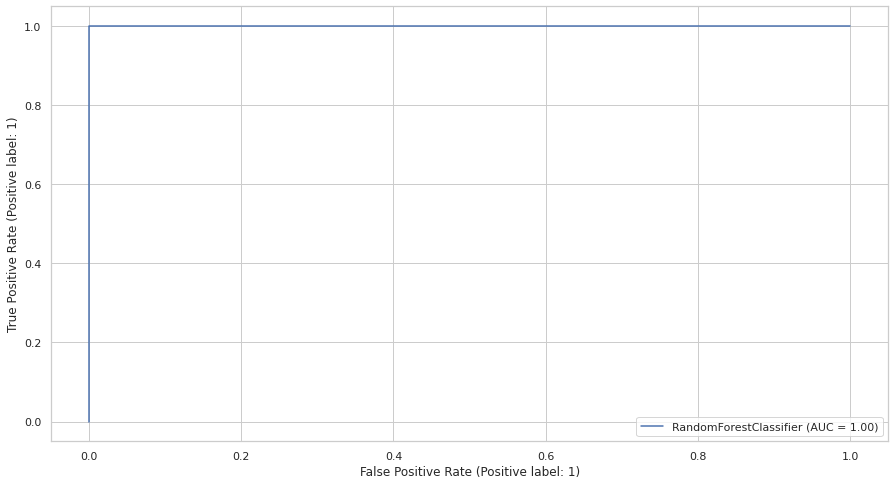

In [ ]:
metrics.plot_roc_curve(random_forest, Xtest, Ytest)


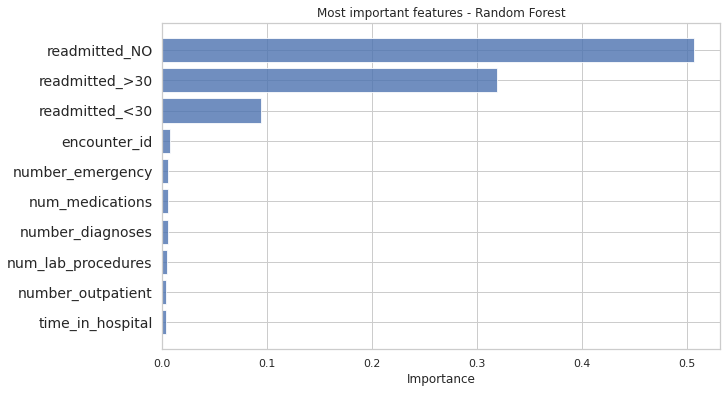

In [ ]:
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()


# **DECISION TREES**

In [ ]:
import numpy as np
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print( "Decision Tree Accuracy is ", accuracy_score(Ytest,ypreddt)*100)


Decision Tree Accuracy is  100.0


In [ ]:
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dot_dt_q2 = tree.export_graphviz(clfgini, out_file="dt_q2.dot", feature_names=Xtrain.columns, max_depth=3, class_names=["1","0"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')

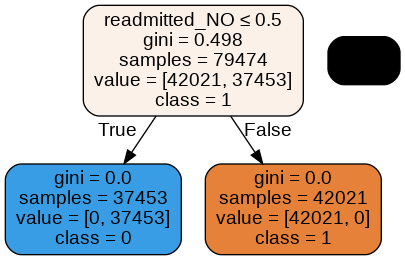

In [ ]:
Image(graph_dt_q2.create_png())

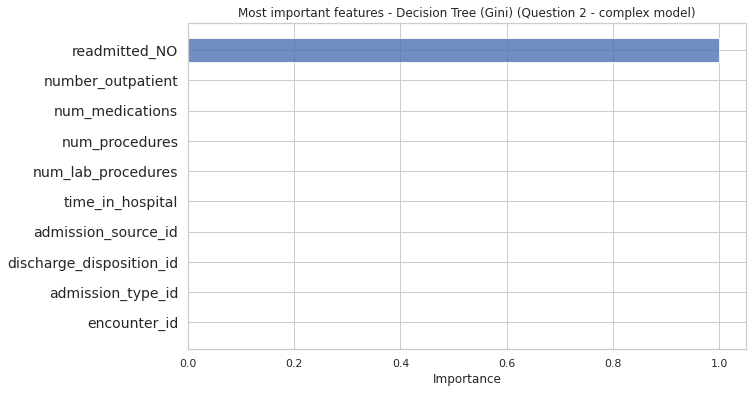

In [ ]:
feature_names = Xtrain.columns
feature_imports = clfgini.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (Gini) (Question 2 - complex model)')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


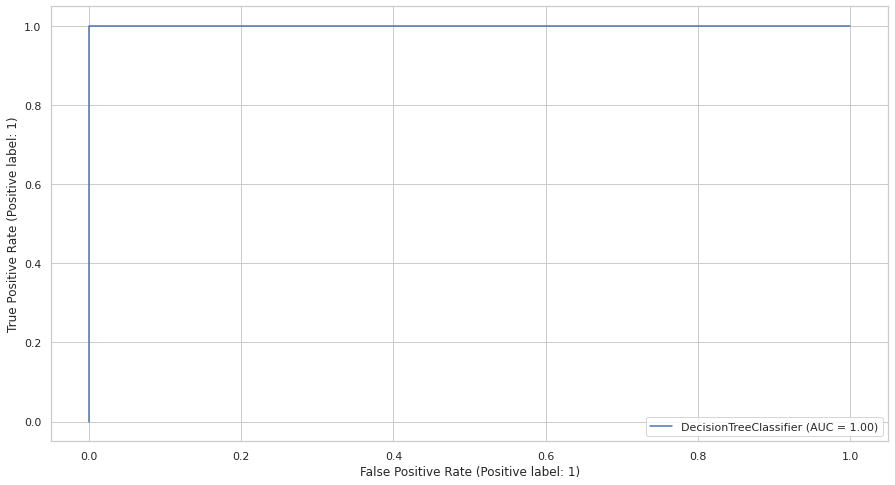

In [ ]:
metrics.plot_roc_curve(clfgini, Xtest, Ytest)

# **Model Evaluation and Model Selection**

In [ ]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier

In [ ]:
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )  # decision tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0, 0.5, 'True Positive Rate')

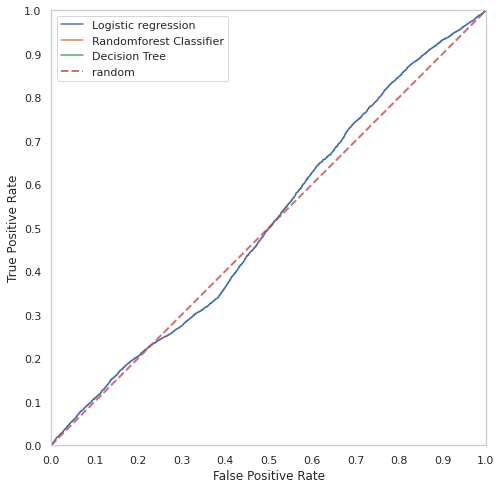

In [ ]:
# compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
# plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
# plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
print("Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

Accuracy of Logistic regression model: 52.87634002717802
Accuracy of Random forest classification:  100.0
Accuracy of Decision Tree  100.0


# **FINAL OBSERVATIONS **

1. Random Forest Classification has the same accuracy than 
Decision Tree. And it is more accurate than the logistic regression model.
2. Women between 10 and 20 receive more lab procedures and medication than the rest of the women in other ages. Also they are readmiteed in the next 30 days. 
3. Women between 10 and 30 moslty present a endocrine diagnostic.



